In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from keras.optimizers import Adam
from keras.datasets import fashion_mnist 


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), y_train: (50000, 1) , x_test: (10000, 32, 32, 3), y_test: (10000, 1)


In [3]:
num_classes = 10  # загальна кількість класів від 0 до 9
num_features = 784  # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

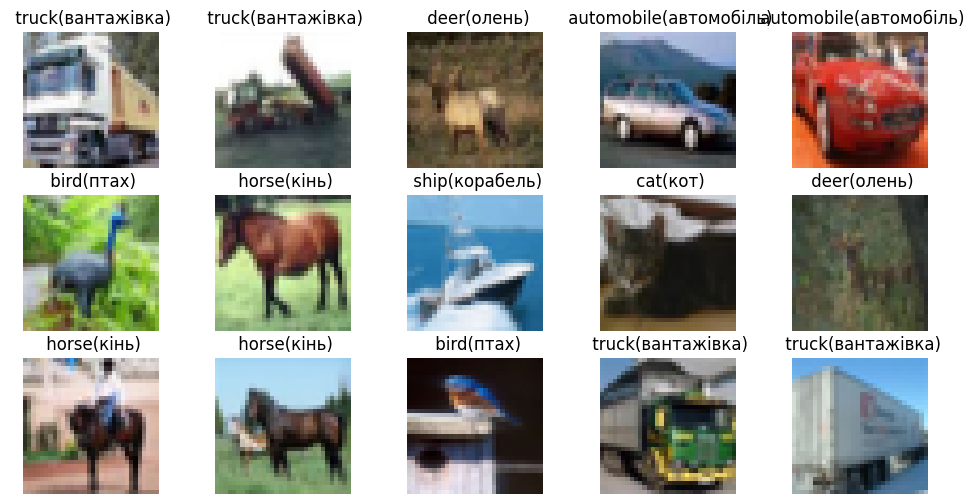

In [4]:

plt.figure(figsize=(12,6))
for i in range(1, 16):
  plt.subplot(3, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")


In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train normalize shape", x_train.shape)
print("x_test normalize shape", x_test.shape)

x_train normalize shape (50000, 32, 32, 3)
x_test normalize shape (10000, 32, 32, 3)


In [6]:

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Перетворення матриці розміром 28x28 пікселів у вектор 
x_train, x_valid, x_test = x_train.reshape(x_train.shape[0], 32, 32, 3 ), x_valid.reshape(x_valid.shape[0], 32, 32, 3), x_test.reshape(10000,32, 32, 3 )

# Нормалізація значення пікселів
# x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255
y_train, y_valid, y_test = utils.to_categorical(y_train, num_classes), utils.to_categorical(y_valid, num_classes), utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape},        y_test: {y_test.shape}")
print(f"x_valid: {x_valid.shape},  y_valid: {y_valid.shape}")

x_train: (45000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (45000, 10),        y_test: (10000, 10)
x_valid: (5000, 32, 32, 3),  y_valid: (5000, 10)


In [7]:
print(  'train ', x_train.shape) 

train  (45000, 32, 32, 3)


In [10]:
from keras import layers
from keras import models
from tensorflow.keras.layers import Input

model = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,137,290 (8.15 MB)

 Trainable params: 2,137,290 (8.15 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(  optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [13]:

history = model.fit(x_train, y_train, epochs=20,batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 103s 141ms/step - accuracy: 0.3252 - loss: 1.8421 - val_accuracy: 0.5626 - val_loss: 1.2249
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 99s 140ms/step - accuracy: 0.5426 - loss: 1.2774 - val_accuracy: 0.5756 - val_loss: 1.1609
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 108s 154ms/step - accuracy: 0.5944 - loss: 1.1268 - val_accuracy: 0.6572 - val_loss: 0.9921
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 104s 147ms/step - accuracy: 0.6285 - loss: 1.0458 - val_accuracy: 0.6622 - val_loss: 0.9444
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 105s 149ms/step - accuracy: 0.6503 - loss: 0.9803 - val_accuracy: 0.7004 - val_loss: 0.8719
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 106s 151ms/step - accuracy: 0.6722 - loss: 0.9283 - val_accuracy: 0.7118 - val_loss: 0.8414
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 103s 147ms/step - accuracy: 0.6789 - loss: 0.8914 - val_accuracy: 0.7096 - val_loss: 0.8356
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 109s 155ms/step - accuracy: 0.7025 - 

In [14]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7344 - loss: 0.7566
Відсоток точності тестових даних:  73.66


In [15]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


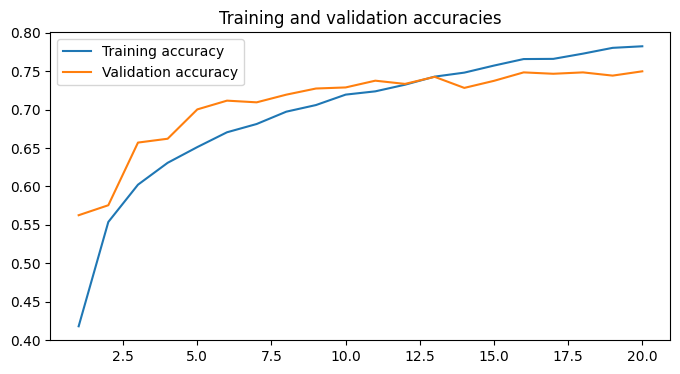

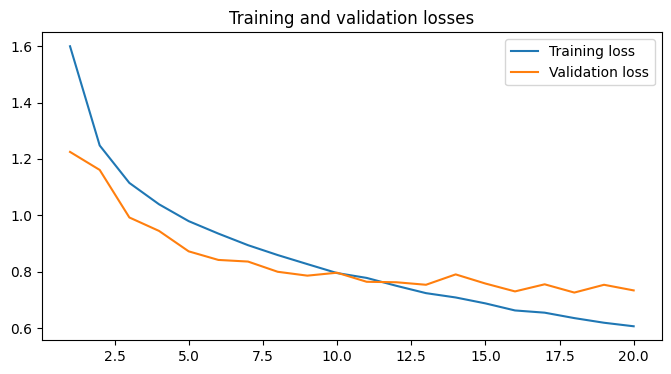

In [16]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [17]:
model.save("basesd_model_CNN.hdf5")

In [18]:
# model = models.load_model("basesd_model_1.hdf5")

Донавчання